In [4]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

In [5]:
#Datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
dfprueba = pd.read_csv(ruta)

In [6]:
#Borrado de datos nulos
dfprueba = dfprueba.dropna()
dfprueba

Suburb          Address  Rooms Type      Price Method  \
1        Abbotsford  25 Bloomburg St      2    h  1035000.0      S   
2        Abbotsford     5 Charles St      3    h  1465000.0     SP   
4        Abbotsford      55a Park St      4    h  1600000.0     VB   
6        Abbotsford     124 Yarra St      3    h  1876000.0      S   
7        Abbotsford    98 Charles St      2    h  1636000.0      S   
...             ...              ...    ...  ...        ...    ...   
12205    Whittlesea    30 Sherwin St      3    h   601000.0      S   
12206  Williamstown      75 Cecil St      3    h  1050000.0     VB   
12207  Williamstown    2/29 Dover Rd      1    u   385000.0     SP   
12209       Windsor  201/152 Peel St      2    u   560000.0     PI   
12212    Yarraville  54 Pentland Pde      6    h  2450000.0     VB   

             SellerG        Date  Distance  Postcode  ...  Bathroom  Car  \
1             Biggin   4/02/2016       2.5    3067.0  ...       1.0  0.0   
2             Biggin   4/03/2017       2.5    3067.0  ...       2.0  0.0   
4             Nelson   4/06/2016       2.5    3067.0  ...       1.0  2.0   
6             Nelson   7/05/2016       2.5    3067.0  ...       2.0  0.0   
7             Nelson   8/10/2016       2.5    3067.0  ...       1.0  2.0   
...              ...         ...       ...       ...  ...       ...  ...   
12205            Ray  29/07/2017      35.5    3757.0  ...       2.0  1.0   
12206       Williams  29/07/2017       6.8    3016.0  ...       1.0  0.0   
12207       Williams  29/07/2017       6.8    3016.0  ...       1.0  1.0   
12209  hockingstuart  29/07/2017       4.6    3181.0  ...       1.0  1.0   
12212        Village  29/07/2017       6.3    3013.0  ...       3.0  2.0   

       Landsize  BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
1         156.0         79.00     1900.0        Yarra -37.80790   144.99340   
2         134.0        150.00     1900.0        Yarra -37.80930   144.99440   
4         120.0        142.00     2014.0        Yarra -37.80720   144.99410   
6         245.0        210.00     1910.0        Yarra -37.80240   144.99930   
7         256.0        107.00     1890.0        Yarra -37.80600   144.99540   
...         ...           ...        ...          ...       ...         ...   
12205     972.0        149.00     1996.0   Whittlesea -37.51232   145.13282   
12206     179.0        115.00     1890.0  Hobsons Bay -37.86558   144.90474   
12207       0.0         35.64     1967.0  Hobsons Bay -37.85588   144.89936   
12209       0.0         61.60     2012.0  Stonnington -37.85581   144.99025   
12212    1087.0        388.50     1920.0  Maribyrnong -37.81038   144.89389   

                  Regionname Propertycount  
1      Northern Metropolitan        4019.0  
2      Northern Metropolitan        4019.0  
4      Northern Metropolitan        4019.0  
6      Northern Metropolitan        4019.0  
7      Northern Metropolitan        4019.0  
...                      ...           ...  
12205      Northern Victoria        2170.0  
12206   Western Metropolitan        6380.0  
12207   Western Metropolitan        6380.0  
12209  Southern Metropolitan        4380.0  
12212   Western Metropolitan        6543.0  

[6196 rows x 21 columns]

In [7]:
dfprueba = dfprueba.select_dtypes(exclude=['object'])
dfprueba

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
6          3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
7          2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
12205      3   601000.0      35.5    3757.0       3.0       2.0  1.0   
12206      3  1050000.0       6.8    3016.0       3.0       1.0  0.0   
12207      1   385000.0       6.8    3016.0       1.0       1.0  1.0   
12209      2   560000.0       4.6    3181.0       2.0       1.0  1.0   
12212      6  2450000.0       6.3    3013.0       6.0       3.0  2.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
1         156.0         79.00     1900.0  -37.80790   144.99340         4019.0  
2         134.0        150.00     1900.0  -37.80930   144.99440         4019.0  
4         120.0        142.00     2014.0  -37.80720   144.99410         4019.0  
6         245.0        210.00     1910.0  -37.80240   144.99930         4019.0  
7         256.0        107.00     1890.0  -37.80600   144.99540         4019.0  
...         ...           ...        ...        ...         ...            ...  
12205     972.0        149.00     1996.0  -37.51232   145.13282         2170.0  
12206     179.0        115.00     1890.0  -37.86558   144.90474         6380.0  
12207       0.0         35.64     1967.0  -37.85588   144.89936         6380.0  
12209       0.0         61.60     2012.0  -37.85581   144.99025         4380.0  
12212    1087.0        388.50     1920.0  -37.81038   144.89389         6543.0  

[6196 rows x 13 columns]

In [11]:
#Remover valores más allá de 3 desviaciones entándar
dfprueba1 = dfprueba.copy()
for columna in df1:
  dfprueba1 = dfprueba1[(np.abs(zscore(dfprueba1[columna]))<=3)]
dfprueba1 

Rooms      Price  Distance  Postcode  Bedroom2  Bathroom  Car  \
1          2  1035000.0       2.5    3067.0       2.0       1.0  0.0   
2          3  1465000.0       2.5    3067.0       3.0       2.0  0.0   
4          4  1600000.0       2.5    3067.0       3.0       1.0  2.0   
6          3  1876000.0       2.5    3067.0       4.0       2.0  0.0   
7          2  1636000.0       2.5    3067.0       2.0       1.0  2.0   
...      ...        ...       ...       ...       ...       ...  ...   
12202      4   821000.0      16.5    3049.0       4.0       3.0  2.0   
12203      3   635000.0      16.5    3049.0       3.0       2.0  1.0   
12206      3  1050000.0       6.8    3016.0       3.0       1.0  0.0   
12207      1   385000.0       6.8    3016.0       1.0       1.0  1.0   
12209      2   560000.0       4.6    3181.0       2.0       1.0  1.0   

       Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  
1         156.0         79.00     1900.0  -37.80790   144.99340         4019.0  
2         134.0        150.00     1900.0  -37.80930   144.99440         4019.0  
4         120.0        142.00     2014.0  -37.80720   144.99410         4019.0  
6         245.0        210.00     1910.0  -37.80240   144.99930         4019.0  
7         256.0        107.00     1890.0  -37.80600   144.99540         4019.0  
...         ...           ...        ...        ...         ...            ...  
12202     544.0        264.00     1997.0  -37.67841   144.87924         2474.0  
12203     691.0        177.00     1975.0  -37.68026   144.88468         2474.0  
12206     179.0        115.00     1890.0  -37.86558   144.90474         6380.0  
12207       0.0         35.64     1967.0  -37.85588   144.89936         6380.0  
12209       0.0         61.60     2012.0  -37.85581   144.99025         4380.0  

[5500 rows x 13 columns]

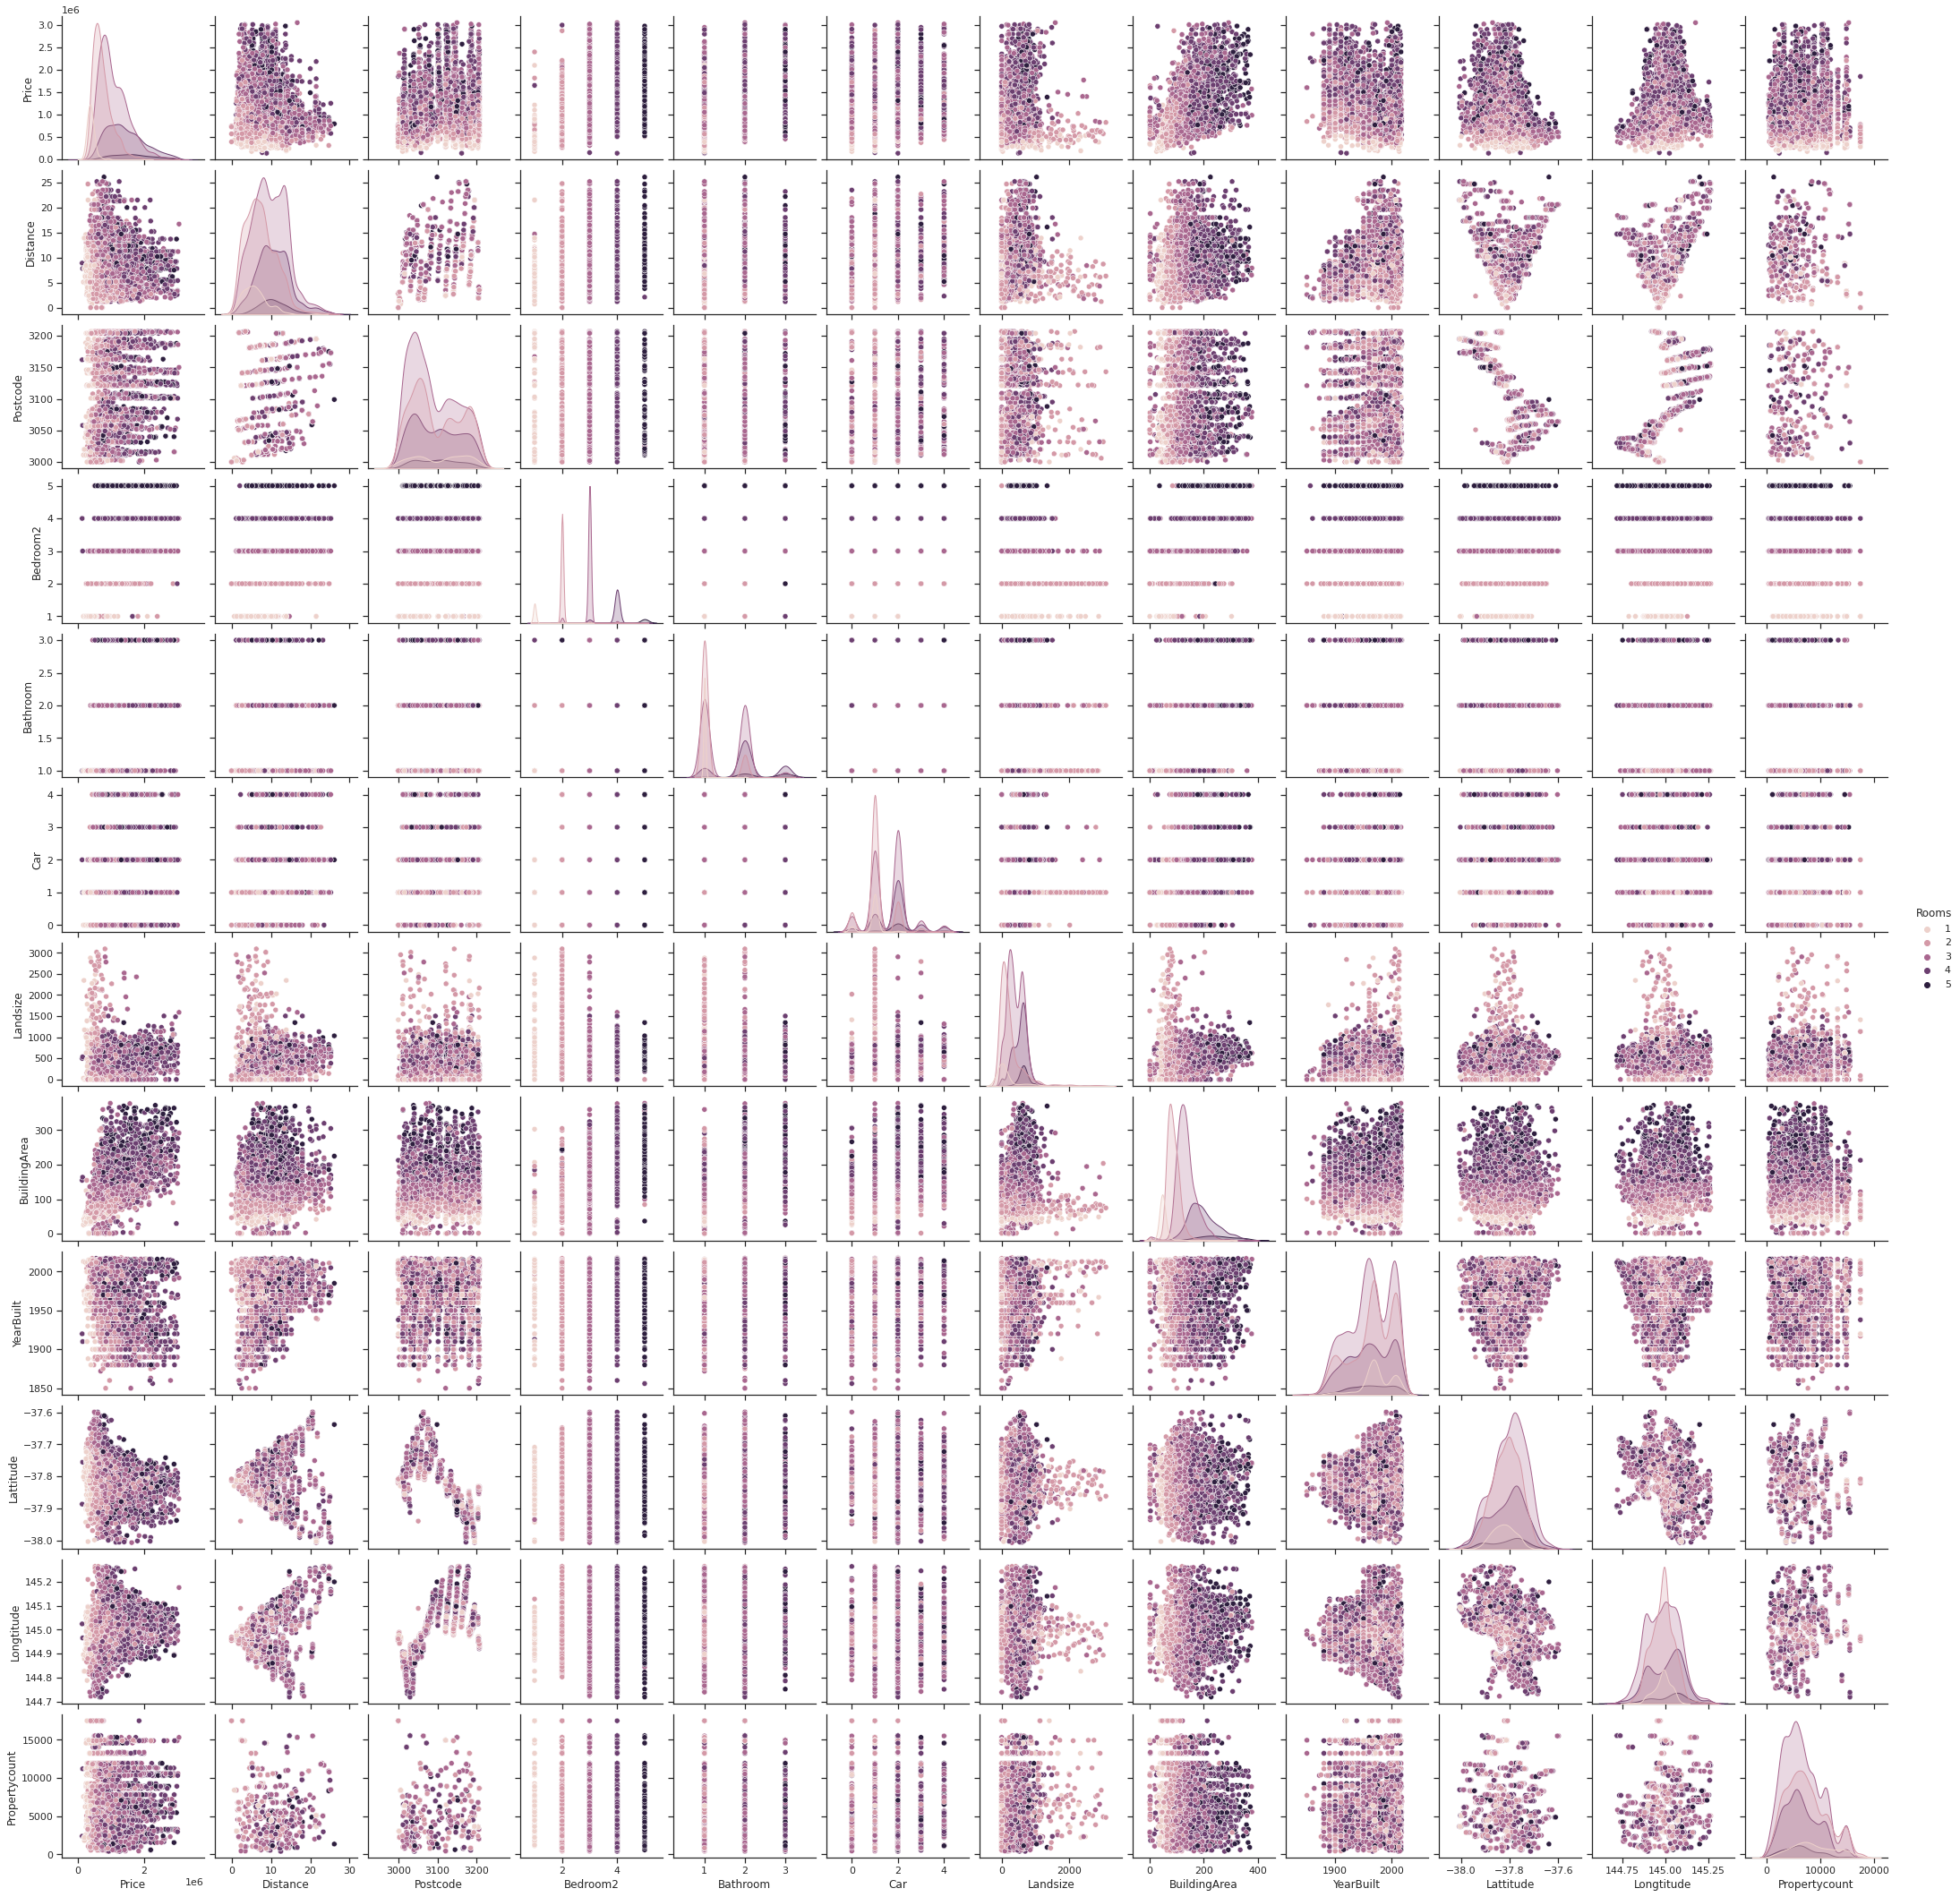

In [12]:
#Múltiples diagramas por parejas
sb.set_theme(style="ticks")
sb.pairplot(dfprueba1, hue='Rooms')

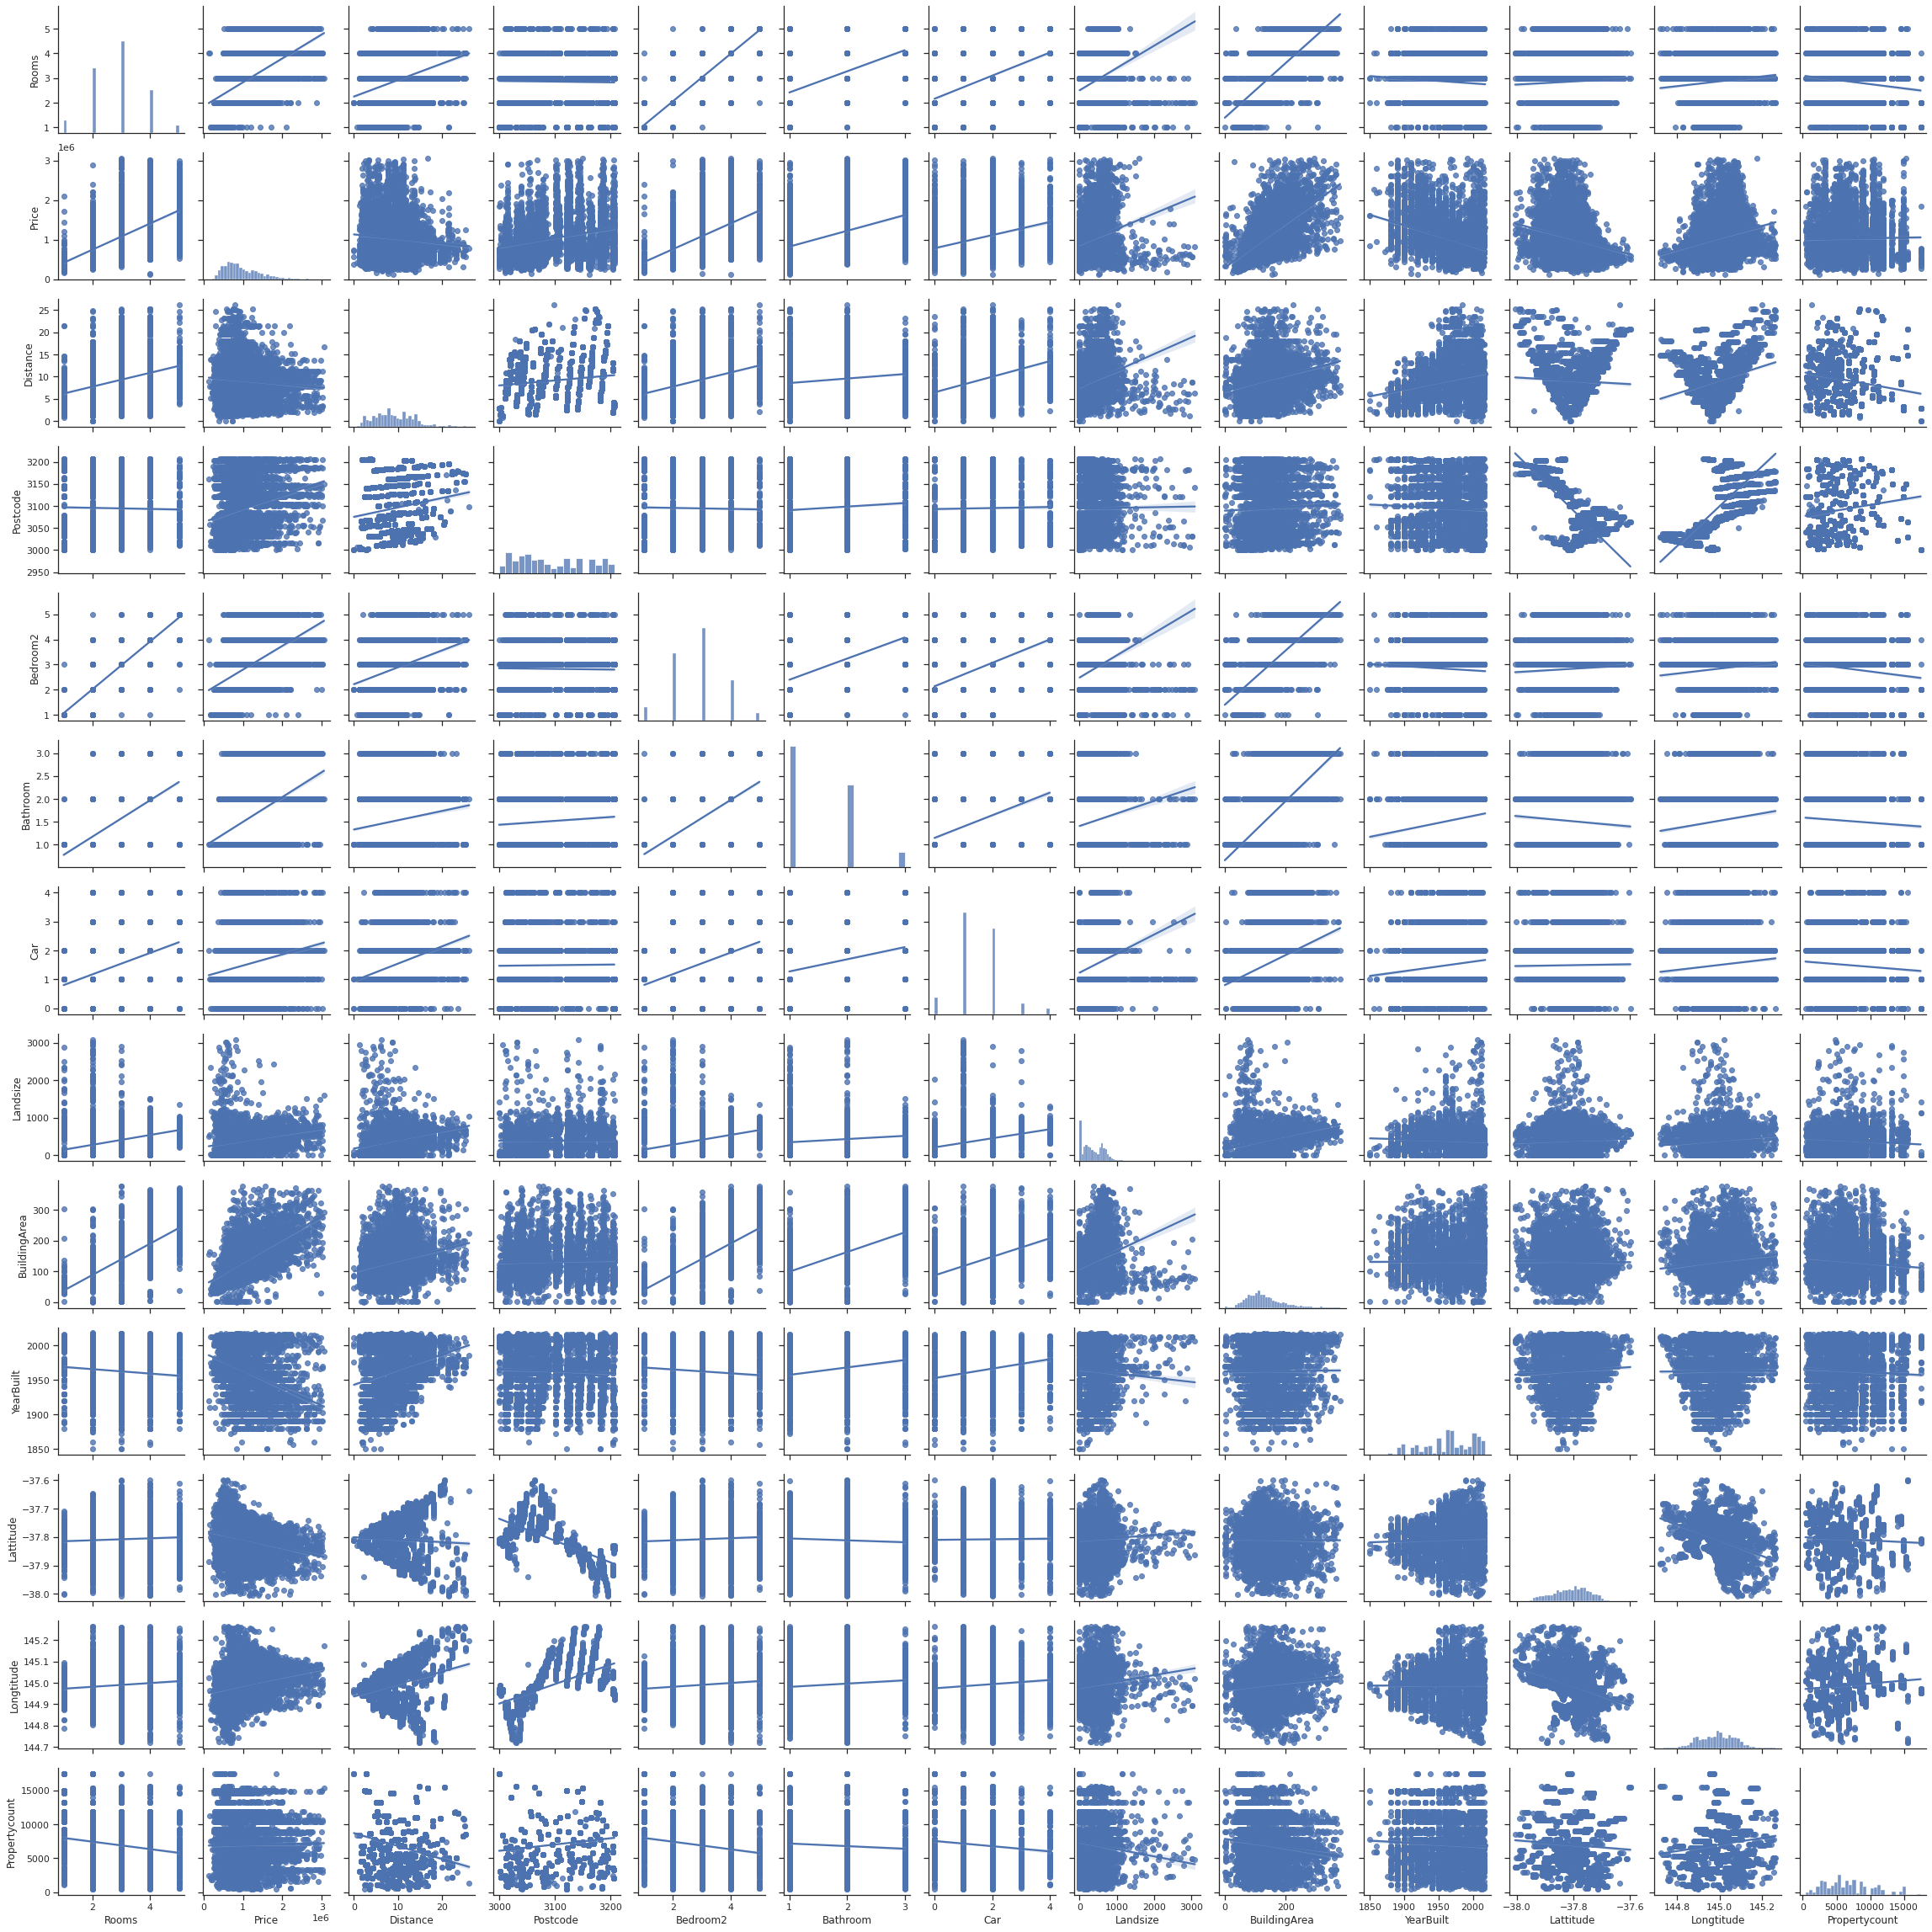

In [13]:
#Múltiples diagramas por parejas
sb.set_theme(style="ticks")
sb.pairplot(dfprueba1, kind='reg')